In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Examen 1


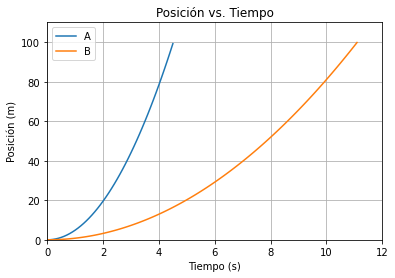

In [95]:
# Parámetros del problema
d0 = 0  # Altura inicial en metros
g_earth = 9.8  # Aceleración debida a la gravedad en la Tierra en m/s²
g_moon = 1.62  # Aceleración debida a la gravedad en la Luna en m/s²

# Crear un array de tiempo de 0 a 10 segundos con incrementos de 0.1 segundos
t = np.arange(0, 12, 0.1)

# Calcular la posición en función del tiempo para la Tierra y la Luna
d_earth = d0 + (1/2) * g_earth * t**2
d_moon = d0 + (1/2) * g_moon * t**2

# Graficar la posición en función del tiempo para la Tierra y la Luna
plt.plot(t[:46], d_earth[:46], label='A')
plt.plot(t[:112], d_moon[:112], label='B')
plt.ylim(0,110)
plt.xlim(0,12)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Posición vs. Tiempo')
plt.legend()
plt.savefig('x(t).png')
plt.show()

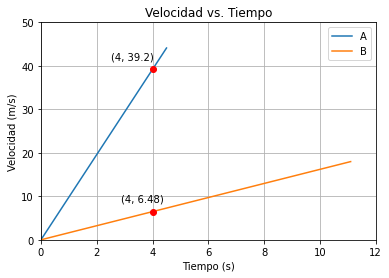

In [96]:
# Calcular la velocidad en función del tiempo para la Tierra y la Luna
v_earth = g_earth * t
v_moon = g_moon * t

# Calculate the values at t=3
t3 = 4
v_earth_t3 = g_earth * t3
v_moon_t3 = g_moon * t3

# Graficar la velocidad en función del tiempo para la Tierra y la Luna
plt.plot(t[:46], v_earth[:46], label='A')
plt.plot(t[:112], v_moon[:112], label='B')
plt.ylim(0,50)
plt.xlim(0,12)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad vs. Tiempo')

# Add the points and annotations
plt.plot(t3,v_earth_t3,'ro')
plt.plot(t3,v_moon_t3,'ro')
plt.annotate(f'({t3}, {np.round(v_earth_t3,2)})', (t3, v_earth_t3), textcoords="offset points", xytext=(-20,10), ha='center')
plt.annotate(f'({t3}, {v_moon_t3})', (t3, v_moon_t3), textcoords="offset points", xytext=(-10,10), ha='center')
plt.legend(loc='best')
plt.savefig('v(t).png')
plt.show()

20.523200000000003


(0.0, 23.0)

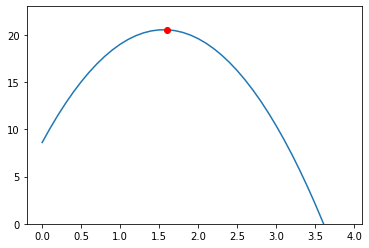

In [97]:
t=np.arange(0,4,0.1)
x=8.6+15.3*t-0.5*9.81*t**2
xmax=np.max(x)
print(xmax)
plt.plot(t,x)
plt.plot(t[np.argmax(x)],xmax,'ro')
plt.ylim(0,23)

# Examen 2

In [19]:
g_earth = -9.8  # Aceleración debida a la gravedad en la Tierra en m/s²

# Calcular la velocidad en función del tiempo
def v(v0,t):
    v = v0 + g_earth * t
    return(v)

# Calcular la posición en función del tiempo
def d(d0,v0,t):
    d = d0 + v0 * t + (1/2) * g_earth * t**2
    return(d)

#Calcular el tiempo usando la resolvente
def t(d0,v0):
    tmas = (-v0 + np.sqrt(v0**2 - 4 * (1/2) * g_earth * d0))/(2 * (1/2) * g_earth)
    tmen= (-v0 - np.sqrt(v0**2 - 4 * (1/2) * g_earth * d0))/(2 * (1/2) * g_earth)
    if tmas < 0:
        return(tmen)
    elif tmen < 0:
        return(tmas)

## ejercicio 1

In [16]:
h0 = 1.7 #m
hf = 0.83 #m
v0 = -0.4 #m/s

#a)tf?
t1 = np.round(t(h0-hf,v0),2)
print(t1)

#b)vf?
v1 = np.round(v(v0,t1),2)
print(v1)

0.38
-4.12


## ejercicio 3

In [17]:
# Crear un array de tiempo de 0 a 12 segundos con incrementos de 0.1 segundos
t = np.arange(0, 12, 0.1)

# posiciones iniciales
da0 = 120
db0 = 90 

#velocidades iniciales
va0 = -15
vb0 = 0


#posicion(t) y velocidad(t)
d_a=d(da0,va0,t)
d_b=d(db0,vb0,t)

v_a=v(va0,t)
v_b=v(vb0,t)

In [126]:
# Coefficients of the quadratic equation
a = 0.5 * g_earth
b = va0
c = da0 - 0

# Calculate the discriminant
discriminant = b**2 - 4*a*c

# Check if the discriminant is positive
if discriminant > 0:
    # Calculate the two roots
    root1a = (-b + np.sqrt(discriminant)) / (2*a)
    root2a = (-b - np.sqrt(discriminant)) / (2*a)
    print("Roots:", root1a, root2a)
elif discriminant == 0:
    # Calculate the single root
    root = -b / (2*a)
    print("Root:", root)
else:
    print("No real roots exist")

# Calculate the values at a specific time
Ta = np.round(root2a,2)
vaT = v(va0,Ta)
print('vfa =', np.round(vaT,2))



Roots: -6.710628631223288 3.6494041414273695
vfa = -50.77


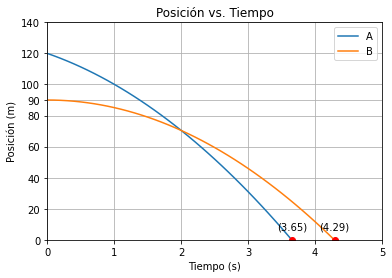

In [129]:
plt.plot(t, d_a, label='A')
plt.plot(t, d_b, label='B')
plt.ylim(0,130)
plt.xlim(0,5)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Posición vs. Tiempo')
# Get current ticks
ticks = plt.yticks()[0]
# Add your tick
ticks = np.append(ticks,90)

# Set new ticks
plt.yticks(ticks) 

# Add the point and annotation
plt.plot(Ta, d(da0, va0, Ta), 'ro')
plt.annotate(f'({Ta})', (Ta, d(da0, va0, Ta)), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(Tb, d(db0, vb0, Tb), 'ro')
plt.annotate(f'({Tb})', (Tb, d(db0, vb0, Tb)), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend(loc='best')
plt.savefig('x2(t).png')
plt.show()

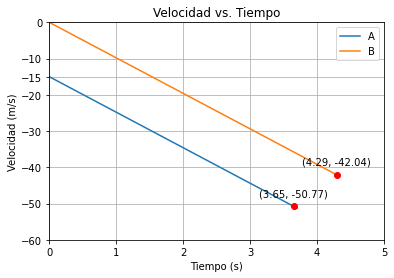

In [103]:
# Graficar la velocidad en función del tiempo para la Tierra y la Luna
ta = np.arange(0,Ta+0.1,0.1)
tb = np.arange(0,Tb+0.1,0.1)
plt.plot(ta, v(va0,ta), label='A')
plt.plot(tb, v(vb0,tb), label='B')
plt.ylim(-55,0)
plt.xlim(0,5)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad vs. Tiempo')

# Get current ticks
ticks = plt.yticks()[0]
# Add your tick
ticks = np.append(ticks,-15)

# Set new ticks
plt.yticks(ticks) 

# Add the point and annotation
plt.plot(Ta, v(va0, Ta), 'ro')
plt.annotate(f'({Ta}, {np.round(v(va0, Ta),2)})', (Ta, v(va0, Ta)), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(Tb, v(vb0, Tb), 'ro')
plt.annotate(f'({Tb}, {np.round(v(vb0, Tb),2)})', (Tb, v(vb0, Tb)), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend(loc='best')
plt.savefig('v2(t).png')
plt.show()

## ejercicio 3

In [152]:
t = np.arange(0,6,0.1)
x = 5.3+19.6*t-0.5*9.81*t**2
xp = 5.3+19.6*1.2-0.5*9.81*1.2**2
xmax=np.max(x)
print('tmax=',t[np.argmax(x)])
print('hmax=',xmax)
print('h(1.2)=',np.round(xp,2))

# Coefficients of the quadratic equation
a = 0.5 * g_earth
b = 19.6
c = 5.3

# Calculate the discriminant
discriminant = b**2 - 4*a*c

# Check if the discriminant is positive
if discriminant > 0:
    # Calculate the two roots
    root1a = (-b + np.sqrt(discriminant)) / (2*a)
    root2a = (-b - np.sqrt(discriminant)) / (2*a)
    print("tf:",root2a)
elif discriminant == 0:
    # Calculate the single root
    root = -b / (2*a)
    print("Root:", root)
else:
    print("No real roots exist")

# Calculate the values at a specific time
TT = np.round(root2a,2)
vaTT = v(19.6,TT)
print('vf =', np.round(vaTT,2))

tmax= 2.0
hmax= 24.88
h(1.2)= 21.76
tf: 4.254247691151357
vf = -22.05


In [21]:
tf = t(5.3, 19.6)
print(tf)

4.254247691151357


Text(0.5, 1.0, 'Posición vs. Tiempo')

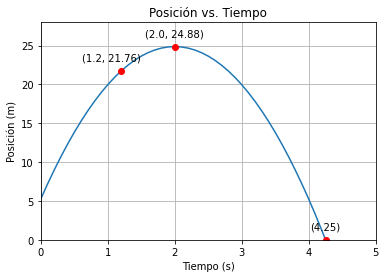

In [148]:
plt.plot(t,x)
plt.plot(t[np.argmax(x)],xmax,'ro')
plt.annotate(f'({np.round(t[np.argmax(x)],2)}, {np.round(xmax,2)})', (t[np.argmax(x)], xmax), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(1.2,xp,'ro')
plt.annotate(f'({1.2}, {np.round(xp,2)})', (1.2, xp), textcoords="offset points", xytext=(-10, 10), ha='center')

plt.plot(TT,0,'ro')
plt.annotate(f'({TT})', (TT, 0), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlim(0,5)
plt.ylim(0,28)

plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Posición vs. Tiempo')